# Расчет бета - коэффициента акции

## Описание:

Бета - коэффициент является индикатором степени риска той или иной акции и показывает, на сколько процентов изменится стоимость акции при изменении рыночного индекса на один процент.

В данном упражнении проведем расчет бета коэффициента на примере котировок обыкновенных акции Сбербанка и индекса Московской биржи.

К-т рассчитан двумя способами - через ковариацию и через коэффициент линейной регрессии. Результаты ниже.

## Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
sns.set_theme()

## Зададим константу (наименования столбцов в импортируемом файле)

In [3]:
COLUMNS = ['TICKER', 'PER', 'DATE', 'TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOL']

## Зададим пользовательскте функции

#### Функция парсинга и предобработки файла

In [4]:
def parse_and_preprocess(path):
    data = pd.read_csv(path)
    data.columns = COLUMNS
    data['DATE'] = pd.to_datetime(data['DATE'], format = '%Y%m%d')
    data.sort_values(by = 'DATE', inplace=True)
    data.set_index('DATE', drop = True, inplace=True)
    return data

#### Функция первичного обзора файла

In [5]:
def init_observ(data):
    print('Выведем датафрейм на экран:')
    display(data)
    print('Сводная информация по датафрейму:')
    data.info()
    print('Проверим наличие пропусков данных:')
    print(data.isna().sum())
    print('Распечатаем график цен закрытия:')
    data['CLOSE'].plot(figsize = (15, 9))
    plt.show()

## Загрузка и обзор данных

### Индекс Московской биржи

#### Загрузка

In [6]:
moex = parse_and_preprocess('IMOEX_200101_230308.csv')

#### Обзор

Выведем датафрейм на экран:


,TICKER,PER,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,,,
2020-01-03,IMOEX,D,0,3059.20,3086.09,3057.36,3076.37,44508670839
2020-01-06,IMOEX,D,0,3075.32,3079.42,3059.47,3078.87,39130289767
2020-01-08,IMOEX,D,0,3076.63,3112.01,3071.88,3110.06,53007480525
2020-01-09,IMOEX,D,0,3105.21,3124.60,3094.85,3118.08,58694873429
2020-01-10,IMOEX,D,0,3117.42,3130.92,3101.21,3123.66,44984451737
...,...,...,...,...,...,...,...,...
2023-03-01,IMOEX,D,0,2261.57,2287.35,2255.63,2279.65,39921732841
2023-03-02,IMOEX,D,0,2284.30,2286.20,2235.53,2254.30,50638414113
2023-03-03,IMOEX,D,0,2250.71,2273.46,2249.81,2272.20,26674798417


Сводная информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 2020-01-03 to 2023-03-07
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  785 non-null    object 
 1   PER     785 non-null    object 
 2   TIME    785 non-null    int64  
 3   OPEN    785 non-null    float64
 4   HIGH    785 non-null    float64
 5   LOW     785 non-null    float64
 6   CLOSE   785 non-null    float64
 7   VOL     785 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 55.2+ KB
Проверим наличие пропусков данных:
TICKER    0
PER       0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64
Распечатаем график цен закрытия:


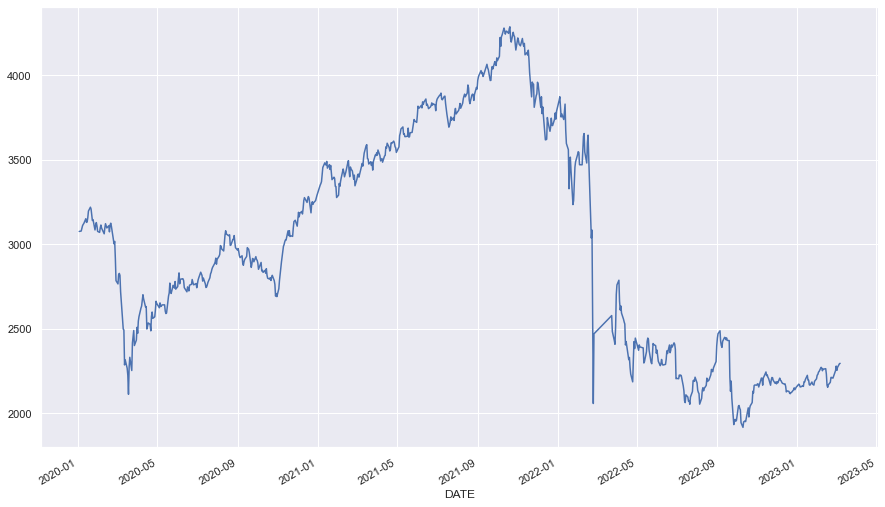

In [7]:
init_observ(moex)

### Сбербанк ао

#### Загрузка

In [8]:
sbrf = parse_and_preprocess('SBER_200101_230308.csv')

#### Обзор датафрейма

Выведем датафрейм на экран:


,TICKER,PER,TIME,OPEN,HIGH,LOW,CLOSE,VOL
DATE,,,,,,,,
2020-01-03,SBER,D,0,255.97,258.19,253.70,255.00,35824160
2020-01-06,SBER,D,0,254.75,254.84,251.40,253.90,22327940
2020-01-08,SBER,D,0,253.62,259.15,253.03,259.15,40736030
2020-01-09,SBER,D,0,259.41,261.76,257.01,257.99,38196300
2020-01-10,SBER,D,0,257.91,259.25,256.88,258.19,18841650
...,...,...,...,...,...,...,...,...
2023-03-01,SBER,D,0,170.40,171.66,169.50,170.53,53655680
2023-03-02,SBER,D,0,170.40,170.40,166.55,168.05,86014000
2023-03-03,SBER,D,0,168.20,171.26,167.90,171.16,49424990


Сводная информация по датафрейму:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 784 entries, 2020-01-03 to 2023-03-07
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TICKER  784 non-null    object 
 1   PER     784 non-null    object 
 2   TIME    784 non-null    int64  
 3   OPEN    784 non-null    float64
 4   HIGH    784 non-null    float64
 5   LOW     784 non-null    float64
 6   CLOSE   784 non-null    float64
 7   VOL     784 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 55.1+ KB
Проверим наличие пропусков данных:
TICKER    0
PER       0
TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOL       0
dtype: int64
Распечатаем график цен закрытия:


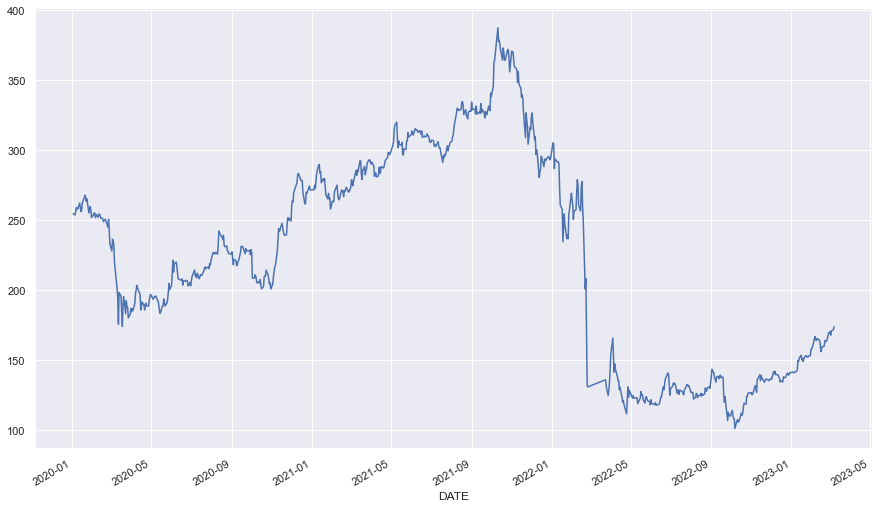

In [9]:
init_observ(sbrf)

## Расчет

Перед тем как расчитать бета - коэффициент нам необходимо посчитать дневные доходности индекса и акции.

In [10]:
moex['returns'] = moex['CLOSE'].pct_change()

In [11]:
sbrf['returns'] = sbrf['CLOSE'].pct_change()

Теперь оставим данные только за те дни, за которые имеются котировки и по индексу и по акции.

In [12]:
moex = moex.dropna()

In [13]:
sbrf = sbrf.dropna()

In [14]:
moex, sbrf = moex.align(sbrf, join = 'inner', axis = 0)

#### Первый подход предполагает расчет беты через ковариацию доходностей акции и индекса 

In [15]:
covariance = sbrf['returns'].cov(moex['returns'])

In [16]:
print('К-т ковариации: {:.6f}'.format(covariance))

К-т ковариации: 0.000482


Бета к-т равен отношению к-та ковариации к дисперсии дневных доходностей индекса.

In [17]:
beta = covariance / moex['returns'].var()

In [18]:
print('Бета ао Сбербанк: {:.4f}'.format(beta))

Бета ао Сбербанк: 1.0340


#### Второй подход предполагает расчет беты через нахождение к-та линейной регрессии доходностей акции к доходности индекса

In [19]:
lm = LinearRegression()

In [20]:
x = moex[['returns']]

In [21]:
y = sbrf[['returns']]

In [22]:
lm.fit(x, y)

LinearRegression()

In [23]:
print('Бета ао Сбербанк: {:.4f}'.format((lm.coef_)[0][0]))

Бета ао Сбербанк: 1.0340


## Выводы:

Как видим, бета Сбера практически равна единице, что означает, что в акции практически отсутствует специфический риск.